In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('spam.csv')

df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
#merge the columns

df["sms"] = df.iloc[:, 1:4].astype("str").agg(' '.join, axis=1)
df["label"] = df.iloc[:, 0]

#replace nan values with empty string
df["sms"] = df["sms"].replace("nan", "", regex=True)

df = df[["sms", "label"]]
df.head(5)

,sms,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [7]:
X = df["sms"]
y = df["label"]

In [8]:
from sklearn.model_selection import train_test_split

#split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
#implement tf-idf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, encoding='utf-8', decode_error='ignore', stop_words='english')

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

tfidf.get_feature_names_out()

array(['00', '000', '008704050406', ..., 'ûò', 'ûówell', 'žö'],
      shape=(7491,), dtype=object)

C:\Users\gabri\AppData\Local\Temp\ipykernel_30348\1476727537.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y_train, palette="Set2")


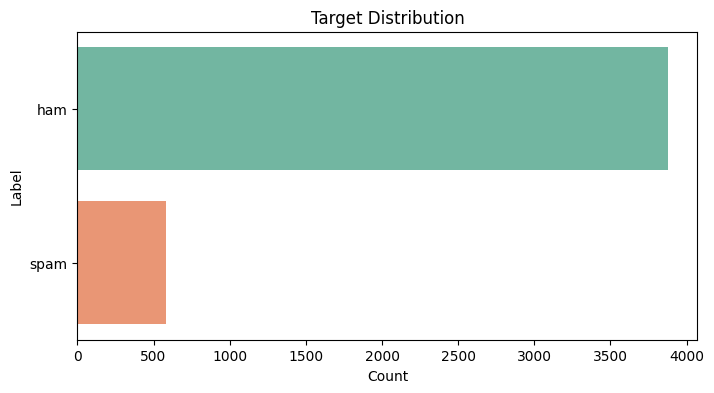

In [ ]:
#plot target distribution

import matplotlib.pyplot as plt

import seaborn as sns

plt.figure(figsize=(8, 4))
sns.countplot(y_train, palette="Set2")
plt.title("Target Distribution")
plt.xlabel("Count")
plt.ylabel("Label")
plt.show()